In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Disease_Diagnosis_dataset/Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Disease_Diagnosis_dataset/Testing.csv')

In [ ]:
print(f'Training Set Dimension -> {train_df.shape}\nTesting Set Dimension -> {test_df.shape}')

Training Set Dimension -> (4920, 134)
Testing Set Dimension -> (42, 133)


In [ ]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
train_df.drop(columns = ['Unnamed: 133'], inplace = True)

y_test = test_df[['prognosis']]

test_df.drop(columns = ['prognosis'], inplace = True)

In [ ]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

In [ ]:
train_df.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
test_df.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
small_dents_in_nails,0
inflammatory_nails,0
blister,0
red_sore_around_nose,0


In [ ]:
X_train = train_df.drop(columns=['prognosis'])
y_train = train_df[['prognosis']]
X_test = test_df

In [ ]:
classifier = GridSearchCV(RandomForestClassifier(n_jobs = 1, random_state = 42), {
    'n_estimators' : [100, 150, 200],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [7, 15, 20],
    'min_samples_split' : [2, 3, 4],
    'max_features' : [50, 100, 133],
    'bootstrap' : [True, False]
})

classifier.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 15, 20],
                         'max_features': [50, 100, 133],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]})

In [ ]:
clf_df = pd.DataFrame(classifier.cv_results_)

In [ ]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_criterion', 'param_max_depth',
       'param_max_features', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
clf_df[['param_bootstrap', 'param_criterion', 'param_max_depth',
       'param_max_features', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by = 'mean_test_score', ascending=False).head()

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,mean_test_score
135,True,entropy,20,50,2,100,1.0
471,False,log_loss,20,100,3,100,1.0
469,False,log_loss,20,100,2,150,1.0
468,False,log_loss,20,100,2,100,1.0
467,False,log_loss,20,50,4,200,1.0


**MODEL BUILDING !!**

In [ ]:
best_params = classifier.best_params_

In [ ]:
best_params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 50,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
model = RandomForestClassifier(n_jobs = 1, random_state = 42, **best_params)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=50, n_jobs=1, random_state=42)

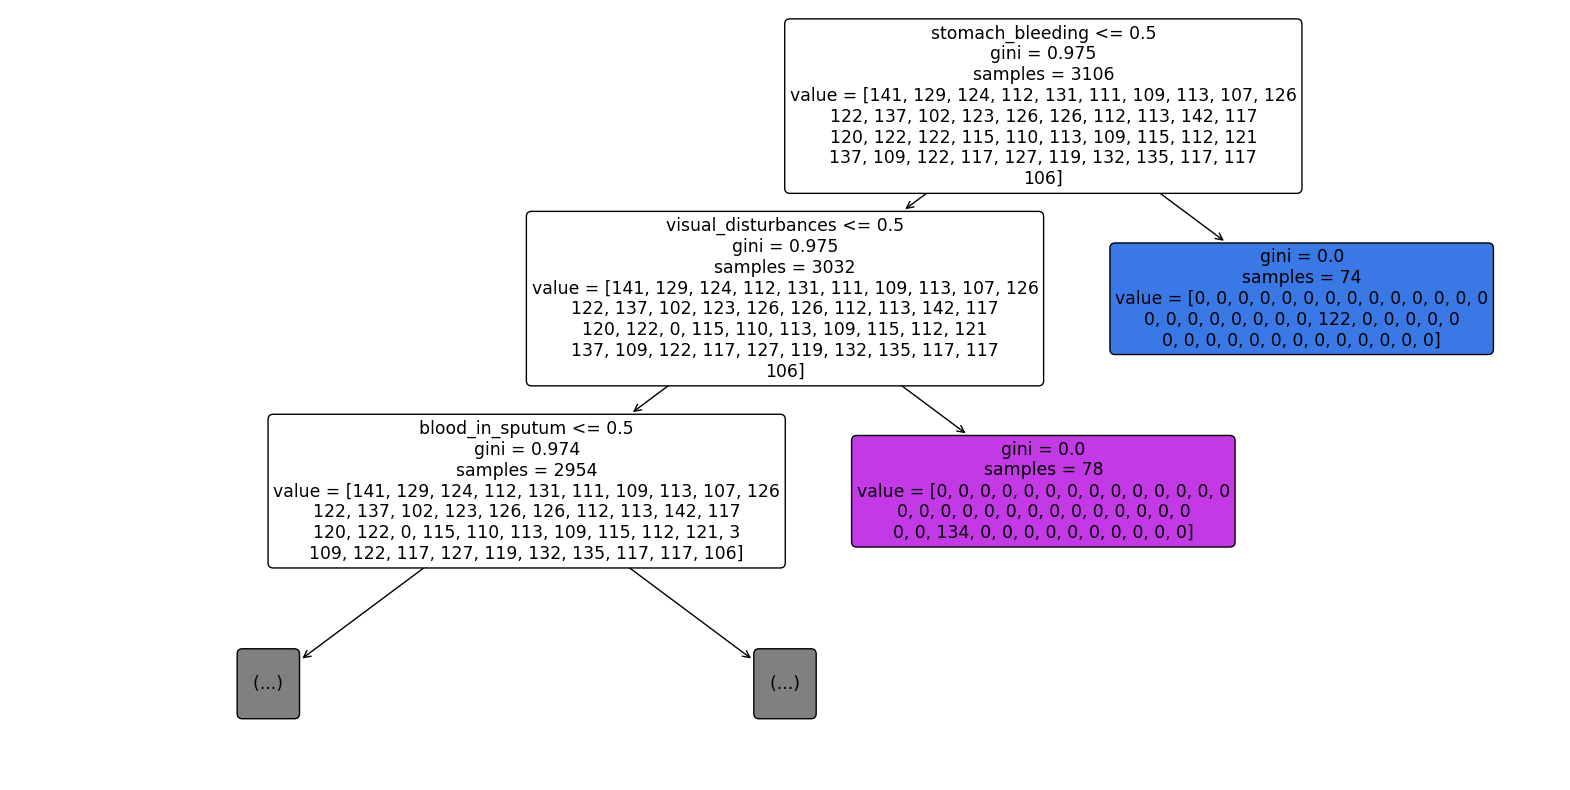

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plot_tree(model.estimators_[0],
          max_depth = 2,
          feature_names = X_train.columns,
          filled = True,
          rounded = True);

In [ ]:
print(f'Model Accuracy -> {model.score(X_test, y_test) * 100}%')

Model Accuracy -> 97.61904761904762%


In [ ]:
pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(220.72222222222223, 0.5, 'Actual')

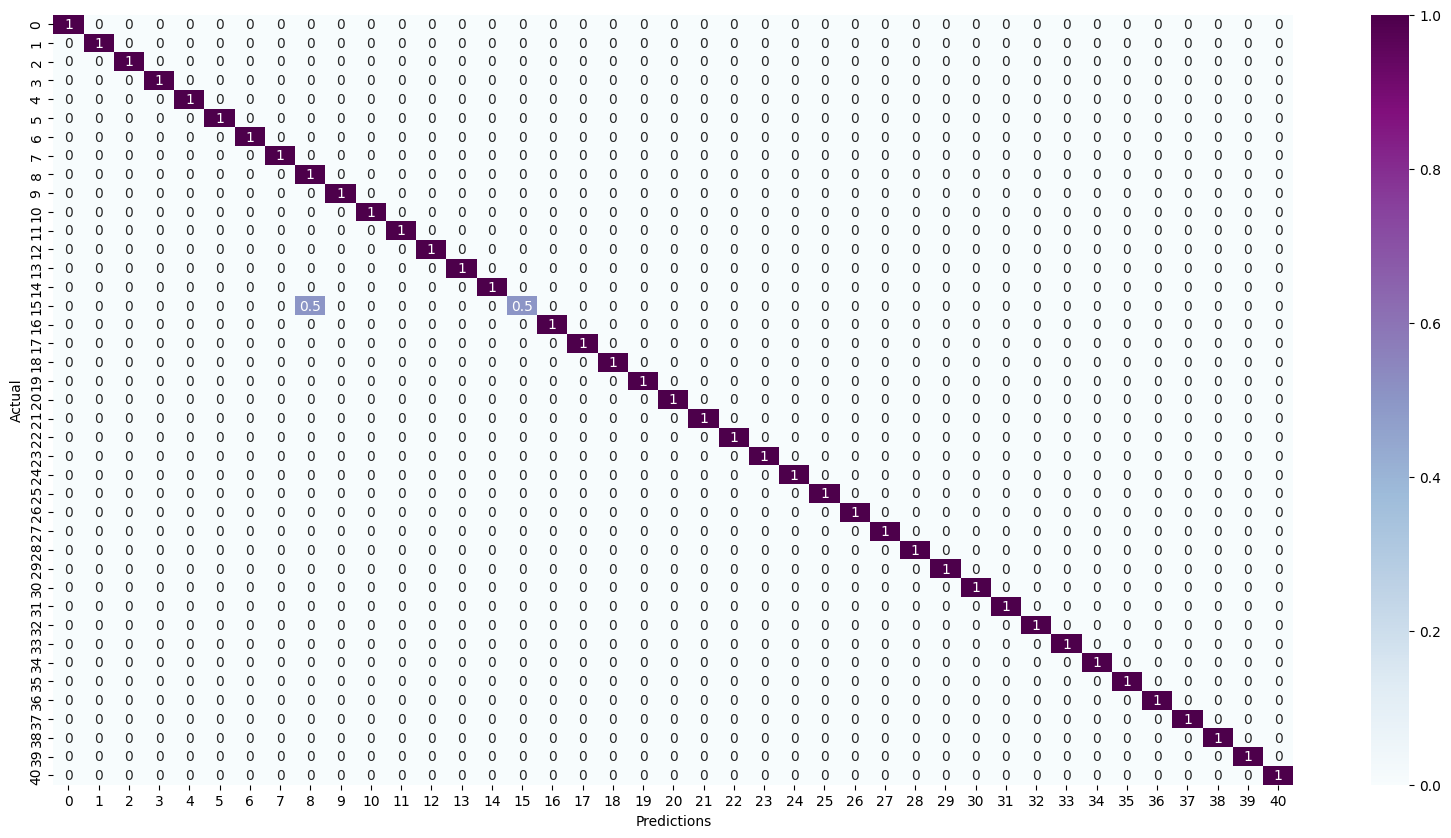

In [ ]:
cm = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cm, annot = True, cmap = 'BuPu')
plt.xlabel('Predictions')
plt.ylabel('Actual')

Function to make Manual Predictions

In [ ]:
def make_predictions(model, feature_names):
  take_input = {}
  for f in feature_names:
    value = input(f'{f}[0: No/ 1: Yes] : ')
    take_input[f] = int(value)
  input_df = pd.DataFrame([take_input])
  prediction = model.predict(input_df)
  return prediction

In [ ]:
feature_names = X_train.columns

prediction = make_predictions(model, feature_names)

print(f"Predicted Prognosis : {prediction[0]}")

itching[0: No/ 1: Yes] : 0
skin_rash[0: No/ 1: Yes] : 0
nodal_skin_eruptions[0: No/ 1: Yes] : 1
continuous_sneezing[0: No/ 1: Yes] : 0
shivering[0: No/ 1: Yes] : 0
chills[0: No/ 1: Yes] : 0
joint_pain[0: No/ 1: Yes] : 1
stomach_pain[0: No/ 1: Yes] : 1
acidity[0: No/ 1: Yes] : 1
ulcers_on_tongue[0: No/ 1: Yes] : 0
muscle_wasting[0: No/ 1: Yes] : 1
vomiting[0: No/ 1: Yes] : 1
burning_micturition[0: No/ 1: Yes] : 0
spotting_ urination[0: No/ 1: Yes] : 0
fatigue[0: No/ 1: Yes] : 1
weight_gain[0: No/ 1: Yes] : 0
anxiety[0: No/ 1: Yes] : 0
cold_hands_and_feets[0: No/ 1: Yes] : 0
mood_swings[0: No/ 1: Yes] : 0
weight_loss[0: No/ 1: Yes] : 0
restlessness[0: No/ 1: Yes] : 1
lethargy[0: No/ 1: Yes] : 1
patches_in_throat[0: No/ 1: Yes] : 0
irregular_sugar_level[0: No/ 1: Yes] : 0
cough[0: No/ 1: Yes] : 0
high_fever[0: No/ 1: Yes] : 1
sunken_eyes[0: No/ 1: Yes] : 0
breathlessness[0: No/ 1: Yes] : 0
sweating[0: No/ 1: Yes] : 0
dehydration[0: No/ 1: Yes] : 1
indigestion[0: No/ 1: Yes] : 1
headache[0